# <b>Boston Housing Regression Analysis</b>
This project using Boston Housing dataset from kaggle. we will use KNN-model and improve the model score using some tricks.


you can click <a href="https://www.kaggle.com/c/boston-housing/overview">here</a> to access the link sources (https://www.kaggle.com/c/boston-housing/overview)

some techniques that used to improve model peformance are:
1. Feature scaling
2. Tuning some parameters (n_neighbors, weights and p score)

<b>Created by: Rizki Yoga Marsyamni</b>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

data="Data/boston.csv"

df=pd.read_csv(data)
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

NameError: name 'sns' is not defined

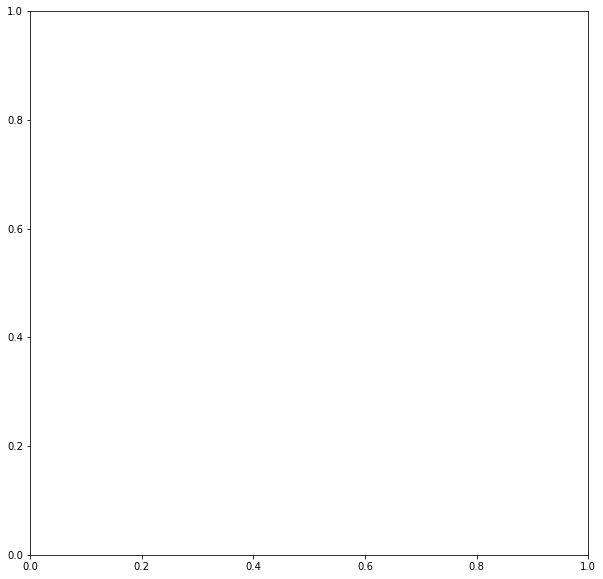

In [6]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


In [ ]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.reshape(-1,1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test", y_test.shape)


Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


# ML MODEL (K-NN Regressor)

### 1. Improvement 1 (Feature Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=6)

In [ ]:
performa_hasil_training=knn.score(X_train_scaled, y_train)
performa_hasil_testing=knn.score(X_test_scaled, y_test)


print("performa data training: ", round(performa_hasil_training, 4),
    "\nperforma data testing: ", round(performa_hasil_testing, 4))
print("Note: compare this results with scaled feature data in parameter tuning below")

performa data training:  0.7935 
performa data testing:  0.6964
Note: compare this results with scaled feature data in parameter tuning below


## 2. Improvement 2 (Parameter Tuning)

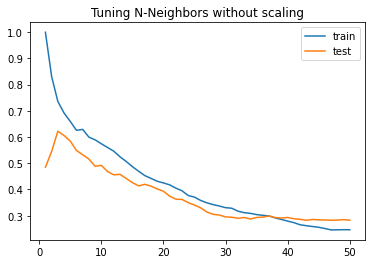

Max test score:  0.6222
n_neighbor:  3


In [ ]:
neighbor= range(1,51,1)
train_score=[]
test_score=[]

for k in neighbor:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()
plt.title("Tuning N-Neighbors without scaling")
plt.show()

print("Max test score: ", round(np.max(test_score), 4))
print("n_neighbor: ", neighbor[np.argmax(test_score)])



### 2.1 Parameter Tuning (scaling)

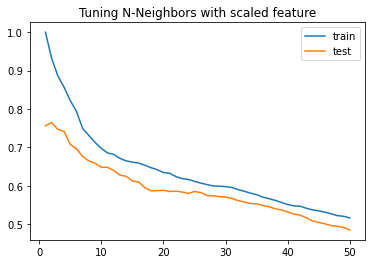

Max test score:  0.7645
n_neighbor:  2


In [ ]:
neighbor = range(1, 51, 1)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.title("Tuning N-Neighbors with scaled feature")
plt.legend()
plt.show()

print("Max test score: ", round(np.max(test_score),4))
print("n_neighbor: ", neighbor[np.argmax(test_score)])


The optimum test score after tuning parameter is 0.7645 using n_neighbor=2

### 2.1 Parameter tuning(scaling) and Tuning n_neighbor with weight by distance

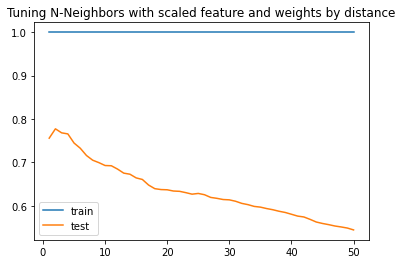

Max test score:  0.7775
n_neighbor:  2


In [ ]:
neighbor = range(1, 51, 1)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.title("Tuning N-Neighbors with scaled feature and weights by distance")
plt.legend()
plt.show()

print("Max test score: ", round(np.max(test_score), 4))
print("n_neighbor: ", neighbor[np.argmax(test_score)])


We get a small improvement score here after adding weights by distance, from <b>0,7655</b> to <b>0,7775</b>

### 2.1 Parameter tuning (scaling) and Tuning n_neighbor with weight by distance + Manhattan distance (p=1)

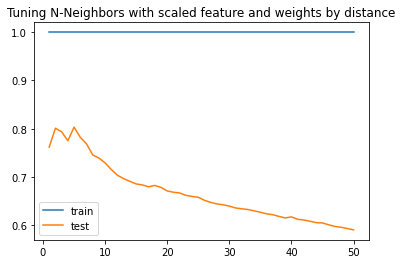

Max test score:  0.8032
n_neighbor:  5


In [ ]:
neighbor = range(1, 51, 1)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1)
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.title("Tuning N-Neighbors with scaled feature and weights by distance")
plt.legend()
plt.show()

print("Max test score: ", round(np.max(test_score), 4))
print("n_neighbor: ", neighbor[np.argmax(test_score)])


Wow! More improvement score here after adding weights by distance + manhattan distance(p=1), from <b>0,7775</b> to <b>0,8032</b>

*Note:
- minkowski metric (p=2)  --> default
- manhattan distance (p=1)

## <b>Conclusion</b>
 - We got better results after improving the feature and tune the ML parameter (using manhattan and weights=distance) just using K-NN models!
 - Simple machine learning model can beat complex models using some tricks; feature scaling, tuning the ML parameters(hyperparameter tuning, and many more)
 - with tuning some parameters, we try to optimize the existing ML models using appropriate hyperparameter combinations and feature scaling
 - This way isn't always effective, it depends on the datasets itself (garbage in garbage out), for some cases better to use modern Machine learning models to get better performance
 
